<a href="https://colab.research.google.com/github/standroidbeta/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module3-reshape-data/LS_DS_123_Reshape_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Reshape data

Objectives
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- pandas documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Upgrade Seaborn

Run the cell below which upgrades Seaborn and automatically restarts your Google Colab Runtime.

In [1]:
'''!pip install seaborn --upgrade
import os
os.kill(os.getpid(), 9)'''

'!pip install seaborn --upgrade\nimport os\nos.kill(os.getpid(), 9)'

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

In [2]:
# .T = transpose
table1.head().T

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [3]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [4]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [5]:
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [6]:
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [7]:
tidy = table1.reset_index().melt(id_vars='index')

tidy = tidy.rename(columns={'index': 'name', 
                            'variable': 'trt',
                            'value': 'result' })

tidy['trt'] = tidy['trt'].str.replace('treatment', '')

tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


##Extra challenge

What if we wanted to change a and b to 0 and 1.

In [8]:
tidy['trt'].replace('a', 0).replace('b', 1)

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [9]:
tidy['trt'].map({'a': 0, 'b': 1})

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [10]:
(tidy['trt'] == 'b').astype(int)

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [11]:
tidy['trt'].apply(lambda x: ord(x) - ord('a'))

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

## Table 2 --> Tidy

In [12]:
table2.columns.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [13]:
table2.index.tolist()

['treatmenta', 'treatmentb']

In [14]:
tidy2 = table2.reset_index().melt(id_vars='index')

tidy2 = tidy2.rename(columns={'index': 'trt', 
                              'variable': 'name',
                             'value': 'result' })

tidy2['trt'] = tidy2['trt'].str.replace('treatment', '')

tidy2

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


#Seaborn Example

The rule can be simply stated:

- Each variable is a column
- Each oberservation is a row

A helpful mindset for determining whether your DataFrames are tidy is the think backwards from the plot you wan to draw. From this perspective, a "variable" is something that with be assigned a role in the plot.

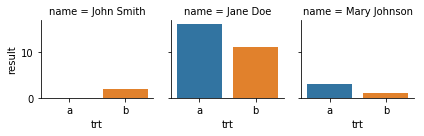

In [15]:
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);

## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [16]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [17]:
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [18]:
tidy.pivot_table(index='name', columns='trt', values='result')

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Tidy --> Table 2

In [19]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [20]:
tidy2

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


In [21]:
tidy2.pivot_table(index='trt', columns='name', values='result')

name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


## Load Instacart data

Let's return to the dataset of [3 Million Instacart Orders](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)

If necessary, uncomment and run the cells below to re-download and extract the data

In [22]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-03-27 22:51:25--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.134.253
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.134.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.4’

instacart_online_gr 100%[===================>] 196.03M  93.1MB/s    in 2.1s    

2019-03-27 22:51:27 (93.1 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.4’ saved [205548478/205548478]



In [23]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


Run these cells to load the data

In [24]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([
    pd.read_csv('order_products__prior.csv').sample(frac=0.50), 
    pd.read_csv('order_products__train.csv').sample(frac=0.50)
])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [26]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [28]:
products.columns.tolist()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [29]:
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [30]:
orders.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [0]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))
          

In [32]:
products.shape, order_products.shape, orders.shape, merged.shape

((49688, 4), (16909552, 4), (3421083, 7), (16909552, 4))

In [0]:
# What condition will filter 'merged' to just the 2 products
# that we care about?

In [0]:
# This is equivalent
condition = ((merged['product_name']=='Half Baked Frozen Yogurt') | 
             (merged['product_name']=='Half and Half Ultra Pasteurized'))
# ...to this

product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

condition = merged['product_name'].isin(product_names)

subset = merged[condition]

In [35]:
merged.shape, subset.shape

((16909552, 4), (2969, 4))

In [36]:
subset.sample(n=5)

,product_id,product_name,order_id,order_hour_of_day
11891887,9292,Half And Half Ultra Pasteurized,564104,18
16010455,30668,Half Baked Frozen Yogurt,3304434,17
13857578,30668,Half Baked Frozen Yogurt,1309061,13
2831135,9292,Half And Half Ultra Pasteurized,2719639,8
365350,9292,Half And Half Ultra Pasteurized,1722447,11


## 4 ways to reshape and plot

### 1. value_counts

In [0]:
froyo = subset[subset['product_name']=='Half Baked Frozen Yogurt']
cream = subset[subset['product_name']=='Half And Half Ultra Pasteurized']

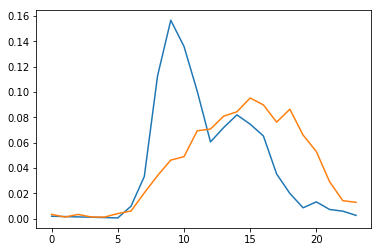

In [38]:
(cream['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot())

(froyo['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot());

### 2. crosstab

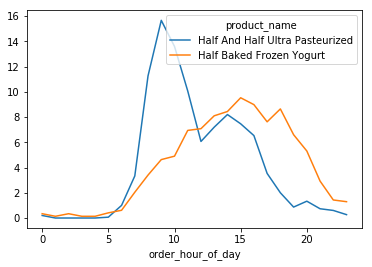

In [39]:
(pd.crosstab(subset['order_hour_of_day'], 
            subset['product_name'], 
            normalize='columns') * 100).plot();

### 3. pivot_table

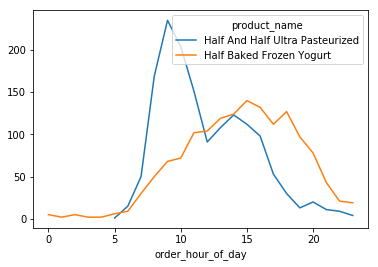

In [40]:
subset.pivot_table(index='order_hour_of_day', 
                   columns='product_name', 
                   values='order_id', 
                   aggfunc=len).plot();

### 4. melt

In [0]:
table = pd.crosstab(subset['order_hour_of_day'], 
                     subset['product_name'], 
                     normalize=True)



In [0]:
melted = (table
  .reset_index()
  .melt(id_vars='order_hour_of_day')
  .rename(columns={
      'order_hour_of_day': 'Hour of Day Ordered', 
      'product_name': 'Product', 
      'value': 'Percent of Orders by Product'
  }))



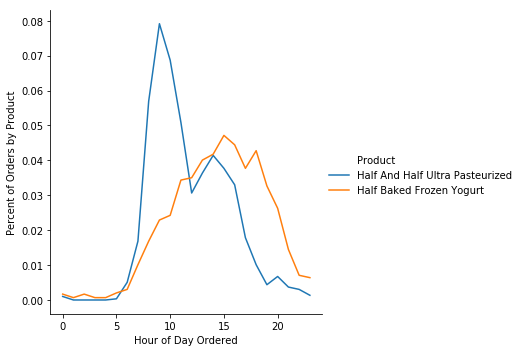

In [43]:
sns.relplot(x='Hour of Day Ordered', 
             y='Percent of Orders by Product', 
             hue='Product', 
             data=melted, 
             kind='line');

In [44]:
display(example)

# ASSIGNMENT
- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
  - Table 2 --> Tidy
  - Tidy --> Table 2

- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')

In [0]:
# subset.pivot_table(index='order_hour_of_day', 
#                    columns='product_name', 
#                    values='order_id', 
#                    aggfunc=len).plot();

In [47]:
flights.columns.tolist()

['year', 'month', 'passengers']

In [48]:
flights_pt = flights.pivot_table(index='year',
                    columns='month',
                    values='passengers')
flights_pt

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


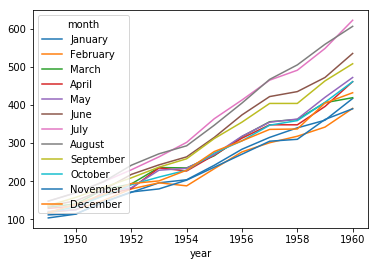

In [49]:
flights.pivot_table(index='year',
                    columns='month',
                    values='passengers').plot();

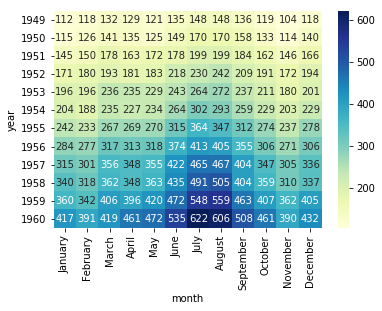

In [50]:
flights_ax = sns.heatmap(flights_pt, annot=True, fmt="d", cmap="YlGnBu")

# STRETCH OPTIONS

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
'''(df
                   .groupby('product_name')
                   .order_hour_of_day.agg(['mean', 'count'])
                   .rename(columns={'mean': 'average time', 
                                    'count': 'total sales'}))'''

sales_by_hour = (merged.groupby('product_name')
                   .order_hour_of_day.agg(['mean', 'count'])
                   .rename(columns={'mean': 'average time of day', 
                                    'count': 'total sales'}))


In [52]:
sales_by_hour

,average time of day,total sales
product_name,,
#2 Coffee Filters,13.161538,390
#2 Cone White Coffee Filters,10.125000,8
#2 Mechanical Pencils,11.000000,6
#4 Natural Brown Coffee Filters,12.808000,125
& Go! Hazelnut Spread + Pretzel Sticks,13.229885,87
(70% Juice!) Mountain Raspberry Juice Squeeze,11.357143,14
+Energy Black Cherry Vegetable & Fruit Juice,12.153846,13
".5\"" Waterproof Tape",9.200000,5
0 Calorie Acai Raspberry Water Beverage,13.181818,55


In [0]:
 melted = (sales_by_hour
  .reset_index()
  .melt(id_vars='average time of day')
  .rename(columns={
      'average time of day': 'Hour of Day Ordered', 
      'product_name': 'Product', 
      'value': 'Percent of Orders by Product'
  }))



In [54]:
melted

,Hour of Day Ordered,variable,Percent of Orders by Product
0,13.161538,product_name,#2 Coffee Filters
1,10.125000,product_name,#2 Cone White Coffee Filters
2,11.000000,product_name,#2 Mechanical Pencils
3,12.808000,product_name,#4 Natural Brown Coffee Filters
4,13.229885,product_name,& Go! Hazelnut Spread + Pretzel Sticks
5,11.357143,product_name,(70% Juice!) Mountain Raspberry Juice Squeeze
6,12.153846,product_name,+Energy Black Cherry Vegetable & Fruit Juice
7,9.200000,product_name,".5\"" Waterproof Tape"
8,13.181818,product_name,0 Calorie Acai Raspberry Water Beverage
9,13.140351,product_name,0 Calorie Fuji Apple Pear Water Beverage


In [55]:
'''order_products = pd.concat([
    pd.read_csv('order_products__prior.csv').sample(frac=0.50), 
    pd.read_csv('order_products__train.csv').sample(frac=0.50)
])'''

"order_products = pd.concat([\n    pd.read_csv('order_products__prior.csv').sample(frac=0.50), \n    pd.read_csv('order_products__train.csv').sample(frac=0.50)\n])"

In [0]:
'''flights.pivot_table(index='year',
                    columns='month',
                    values='passengers').plot();'''

hourly_sales_pt = sales_by_hour.pivot_table(index='average time of day',
                  columns='product_name',
                  values='total sales');


# sns.relplot(x='Hour of Day Ordered', 
#             y='Percent of Orders by Product', 
#             hue='Product', 
#             data=melted, 
#             kind='line');

In [0]:
hourly_sales_pt
